<a href="https://colab.research.google.com/github/SagarGuttal/Deep-Learning/blob/main/Cifar10_dataset_deeplearning(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from numpy.random import seed
import itertools 
from tensorflow.keras.datasets import cifar10


In [2]:
dataset=cifar10.load_data()

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = dataset

In [4]:
type(dataset)

tuple

In [5]:
type(cifar10)

module

In [6]:
x_train_all.shape

(50000, 32, 32, 3)

In [7]:
y_train_all.shape

(50000, 1)

In [8]:
len(y_train_all)

50000

In [9]:
y_train_all[1][0]

9

In [10]:
import pandas as pd
labels_column=[]
for i in range(len(y_train_all)):
  label=y_train_all[i][0]
  labels_column.append(label)

In [11]:
Labels=pd.Series(labels_column)
Labels.value_counts()

6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
dtype: int64

In [12]:
Labels.unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=int8)

In [13]:
Label_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Image_width = 32
image_breadth = 32
Image_channel = 3
number_of_class = 10 
Total_input = Image_width * image_breadth * Image_channel
Total_number_of_rows = len(x_train_all)

In [14]:
print(f"Total {Total_number_of_rows} rows/records are in datsets")
print("Image width = ",Image_width)
print("Image breadth = ",image_breadth)
print("Image channel = ",Image_channel)
print(f"Total inputs =",Total_input)
print(f"Total {number_of_class} class are in target column")
print("Label names :- ",Label_names)

Total 50000 rows/records are in datsets
Image width =  32
Image breadth =  32
Image channel =  3
Total inputs = 3072
Total 10 class are in target column
Label names :-  ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


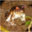

In [15]:
from tensorflow.keras.preprocessing.image import array_to_img
## Lets convert array into image
## Lets see first image
pic = array_to_img(x_train_all[0])
pic 

In [16]:
##Lets see label column for first image
label_for_image = Label_names[y_train_all[0][0]]
label_for_image

'Frog'

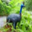

In [17]:
## second Pic 
pic_2= array_to_img(x_train_all[6])
pic_2

In [18]:
##Lets see label column for second image
label_for_image_1 = Label_names[y_train_all[6][0]]
label_for_image_1

'Bird'

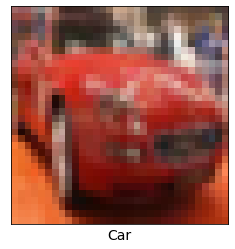

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_train_all[5])
plt.xlabel(Label_names[y_train_all[5][0]],fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

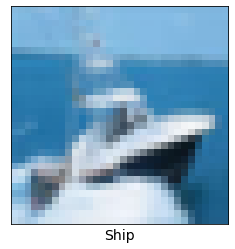

In [20]:
plt.imshow(x_train_all[8])
plt.xlabel(Label_names[y_train_all[8][0]],fontsize = 14)
plt.xticks([])
plt.yticks([])
plt.show()

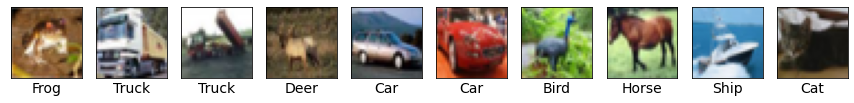

In [21]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Label_names[y_train_all[i][0]],fontsize = 14)
  plt.imshow(x_train_all[i])

In [22]:
## data preprocessing
print(x_train_all[0][0][0][0])
print(x_train_all[0][0][0][0]/255)

59
0.23137254901960785


In [23]:
x_train_all, x_test = x_train_all/255, x_test/255

In [24]:
print(x_train_all[0][0][0][0])

0.23137254901960785


In [25]:
# check the training shape
print("x Training shape :-",x_train_all.shape)
print("y Training shape :-",y_train_all.shape)

x Training shape :- (50000, 32, 32, 3)
y Training shape :- (50000, 1)


In [26]:
# check the testing shape
print("x Testing shape :-",x_test.shape)
print("y Testing shape :-",y_test.shape)

x Testing shape :- (10000, 32, 32, 3)
y Testing shape :- (10000, 1)


In [27]:
## Reshaping  the dataset (50000,3072) and (10000,1)
x_train_all = x_train_all.reshape(x_train_all.shape[0],3072)
x_test = x_test.reshape(len(x_test),3072)

In [28]:
## checking shape after reshaping
print("x Training shape :-",x_train_all.shape)
print("y Training shape :-",y_train_all.shape)
print("*"*60)
print("x Testing shape :-",x_test.shape)
print("y Testing shape :-",y_test.shape)

x Training shape :- (50000, 3072)
y Training shape :- (50000, 1)
************************************************************
x Testing shape :- (10000, 3072)
y Testing shape :- (10000, 1)


In [29]:
## Taking validation data
validation_size = 10000
x_val = x_train_all[:validation_size]
y_val = y_train_all[:validation_size]

In [30]:
## Checking shape of validation data
print("x validation shape :-",x_val.shape)
print("y validation shape :-",y_val.shape)

x validation shape :- (10000, 3072)
y validation shape :- (10000, 1)


In [31]:
## How model is created
# 1. define the model
# 2. compile the model
# 3. fitting the model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [33]:
model_1 = Sequential([Dense(units = 128, input_dim = 3072, activation ='relu',name = 'm1_hidden1'),
                      Dense(units = 64, activation='relu', name = 'm1_hidden2'),
                      Dense(units = 32, activation='relu', name = 'm2_hidden3'),
                      Dense(units = 10, activation='softmax', name = 'm1_output')])

In [34]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
type(model_1)

keras.engine.sequential.Sequential

In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 32)                2080      
                                                                 
 m1_output (Dense)           (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [37]:
(3072 * 128) + (128 * 64) + (64 * 32) + (32 * 10)

403776

In [38]:
(3072 * 128) + (128 * 64) + (64 * 32) + (32 * 10) + 128 + 64 + 32 +10

404010

In [39]:
393344 + 8256 + 2080 + 330

404010

In [50]:
#Early stoping :-
# EarlyStopping if top training when a monitored metric has stopped improving. it means when training 
#the model there is no change in "accuracy" when more number more epoch is running but we have to 
#limimt the epoch based on early stoping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [52]:
## Fitting training data to model also fitting validation data to model
model_history = model_1.fit(x_train_all,y_train_all, batch_size = 1000, epochs = 100, verbose = 1, validation_data = (x_val,y_val),callbacks=early_stopping)

Epoch 1/100
50/50 [==============================] - 4s 79ms/step - loss: 1.3667 - accuracy: 0.5163 - val_loss: 1.3516 - val_accuracy: 0.5215
Epoch 2/100
50/50 [==============================] - 3s 55ms/step - loss: 1.3662 - accuracy: 0.5165 - val_loss: 1.3320 - val_accuracy: 0.5275
Epoch 3/100
50/50 [==============================] - 3s 55ms/step - loss: 1.3529 - accuracy: 0.5200 - val_loss: 1.3713 - val_accuracy: 0.5146
Epoch 4/100
50/50 [==============================] - 3s 57ms/step - loss: 1.3532 - accuracy: 0.5223 - val_loss: 1.3166 - val_accuracy: 0.5349
Epoch 5/100
50/50 [==============================] - 3s 58ms/step - loss: 1.3468 - accuracy: 0.5230 - val_loss: 1.3771 - val_accuracy: 0.5139
Epoch 6/100
50/50 [==============================] - 3s 58ms/step - loss: 1.3480 - accuracy: 0.5254 - val_loss: 1.3200 - val_accuracy: 0.5313
Epoch 7/100
50/50 [==============================] - 3s 59ms/step - loss: 1.3412 - accuracy: 0.5240 - val_loss: 1.3088 - val_accuracy: 0.5364
Epoch 

In [41]:
# number of iteration for 1_epoch = 40000/1000 = 40
# the number of batches is equal to number of iterations for one epoch
# 40 batches is 1 iteration for one epochs

In [42]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

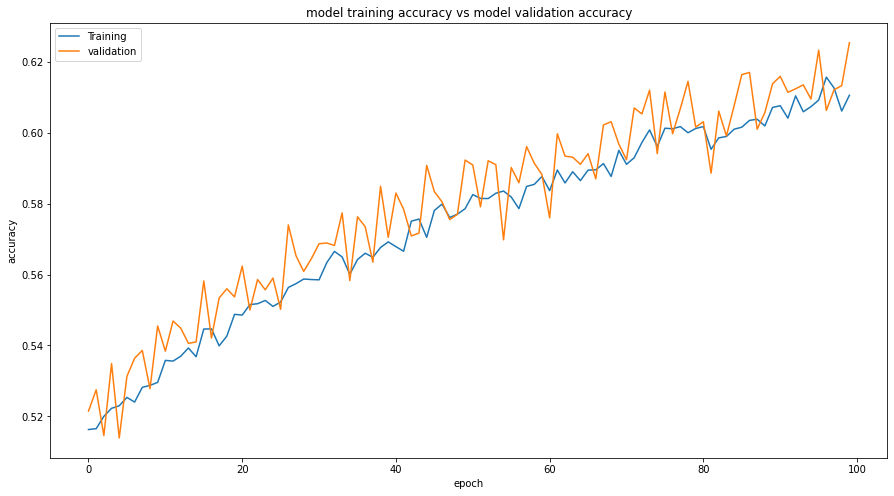

In [53]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model training accuracy vs model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

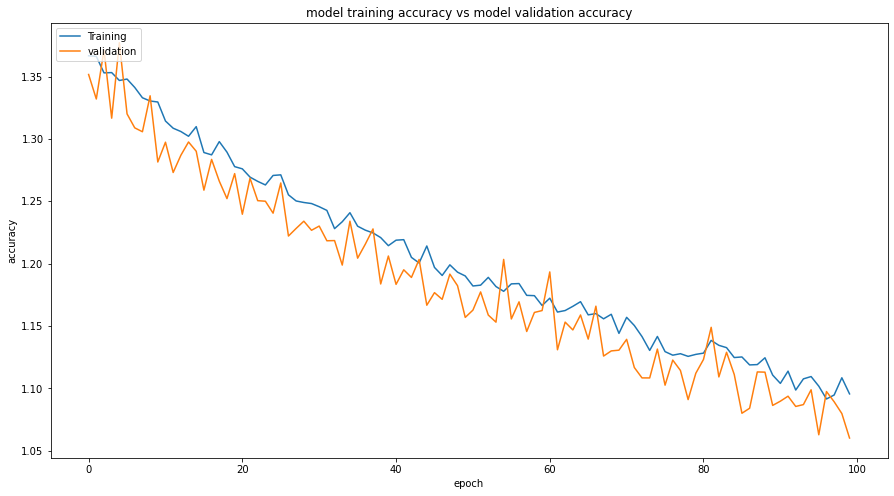

In [54]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model training accuracy vs model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

In [55]:
predictions = np.argmax(model_1.predict(x_test), axis = 1)
predictions

array([3, 8, 8, ..., 5, 5, 7])

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
score = accuracy_score(y_test,predictions)
score * 100

50.72

In [58]:
cm= confusion_matrix(y_test,predictions)

In [59]:
cm

array([[609,  24,  48,  27,  24,  20,  34,  34, 108,  72],
       [ 67, 521,  24,  31,  10,   5,  24,  25,  74, 219],
       [ 82,  17, 339,  85, 122,  77, 154,  78,  16,  30],
       [ 28,  24,  61, 371,  57, 178, 168,  40,  30,  43],
       [ 54,  14,  98,  78, 405,  47, 171,  97,  24,  12],
       [ 29,   9,  62, 265,  57, 360, 112,  61,  21,  24],
       [ 16,  12,  36,  98,  81,  36, 672,  14,  14,  21],
       [ 52,  15,  47, 101,  69,  60,  39, 546,  16,  55],
       [125,  46,  18,  46,  13,  16,  18,  11, 625,  82],
       [ 46, 127,  14,  34,   6,  15,  28,  40,  66, 624]])